In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#import train and test files
path_test = "C:\\CSE\\Linear Reg\\Test.csv"
path_train = "C:\\CSE\\Linear Reg\\Train.csv"
train_file = pd.read_csv(f"{path_train}")
test_file = pd.read_csv(f"{path_test}")
# Drop unnecessary columns (first pass)
train_file = train_file.drop(columns=["Unnamed: 0"], errors="ignore")
test_file = test_file.drop(columns=["Unnamed: 0"], errors="ignore")

Extract the numeric values from columns (integer values)

In [4]:
# Extract numeric parts from strings for columns with mixed data types
train_file["Mileage"] = train_file["Mileage"].str.extract(r"([\d\.]+)").astype(float)
train_file["Engine"] = train_file["Engine"].str.extract(r"([\d\.]+)").astype(float)
train_file["Power"] = train_file["Power"].str.extract(r"([\d\.]+)").astype(float)
test_file["Mileage"] = test_file["Mileage"].str.extract(r"([\d\.]+)").astype(float)
test_file["Engine"] = test_file["Engine"].str.extract(r"([\d\.]+)").astype(float)
test_file["Power"] = test_file["Power"].str.extract(r"([\d\.]+)").astype(float)

Fill the empty cells with median value to keep its effect minimum

In [5]:
# Fill missing values with median for certain columns
for col in ["Mileage", "Engine", "Power", "Seats"]:
    if col in train_file.columns:
        train_file[col] = train_file[col].fillna(train_file[col].median())
        test_file[col] = test_file[col].fillna(test_file[col].median())
train_file


,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Tata Tiago 1.2 Revotron XZ WO Alloy,Hyderabad,2017,16500,Petrol,Manual,First,23.84,1199.0,84.00,5.0,5.00
1,Mahindra TUV 300 2015-2019 mHAWK100 T8 AMT,Kochi,2017,47357,Diesel,Automatic,First,18.49,1493.0,100.00,7.0,8.37
2,Skoda Rapid 2013-2016 1.6 MPI Ambition,Mumbai,2014,35000,Petrol,Manual,First,15.00,1598.0,103.52,5.0,4.50
3,Tata Indica V2 DLS BSII,Jaipur,2007,200000,Diesel,Manual,Second,17.20,1396.0,53.50,5.0,0.85
4,Tata Manza Club Class Quadrajet90 LX,Mumbai,2013,64000,Diesel,Manual,Second,21.02,1248.0,88.76,5.0,2.65
...,...,...,...,...,...,...,...,...,...,...,...,...
3745,BMW X5 3.0d,Chennai,2009,150000,Diesel,Automatic,First,11.00,2993.0,235.00,5.0,18.75
3746,Mahindra Scorpio 2009-2014 VLX 4WD AT 7S BSIV,Delhi,2012,85000,Diesel,Automatic,First,11.79,2179.0,120.00,7.0,6.25
3747,Maruti Wagon R LXI BSII,Ahmedabad,2007,55100,Petrol,Manual,First,18.90,998.0,67.10,5.0,1.45
3748,Renault Duster 85PS Diesel RxL,Hyderabad,2014,77500,Diesel,Manual,First,20.45,1461.0,83.80,5.0,6.60


Extract columns with numeric value to tabulate correlation table

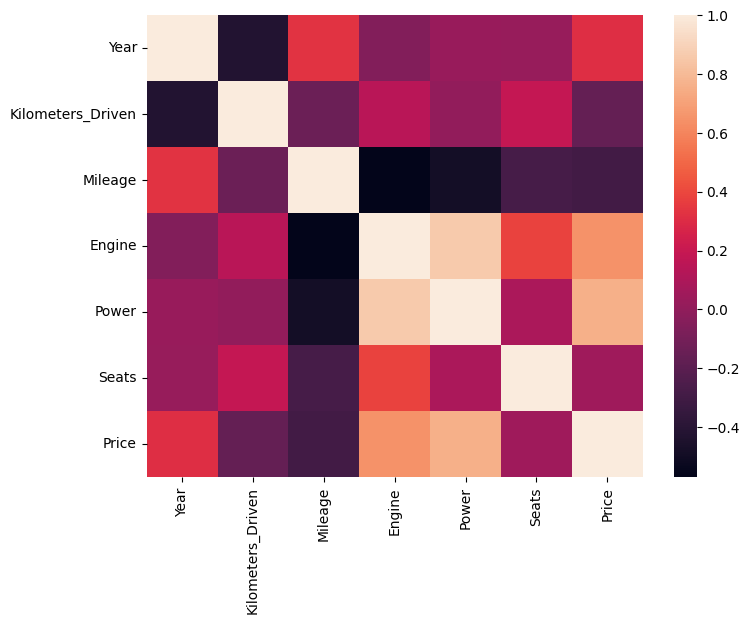

In [6]:
numeric_columns = train_file.select_dtypes(include=[np.number]).columns
train_file_numeric = train_file[numeric_columns]

# Calculate the correlation matrix
correlation_matrix = train_file_numeric.corr()
plt.figure(figsize=(8, 6))  # Adjust the size of the plot
sns.heatmap(correlation_matrix)
plt.show()

Correlation Table
here its seen Kilometers_Driven and Mileage have -ve correlation with price. It is better to not consider them as a feature input for training data.
It can also be observed engine has high correlation with power. So engine can be dropped.
the Categorical columns with n types of input can be branced into n-1 columns, with all 0 indicating nth condition.
this is achieved using get_dummies
the irrelevant columns are stored in string and excluded 

In [7]:
# Convert categorical columns to dummies
cats = ["Fuel_Type", "Transmission", "Owner_Type", "Location"]
train_file = pd.get_dummies(train_file, columns=cats, drop_first=True)
test_file = pd.get_dummies(test_file, columns=cats, drop_first=True)

# Define columns to exclude (exclude from test_file)
columns_to_exclude = ["Price", "Name", "Engine", "Seats","Year","Kilometers_Driven"]

columns = test_file.columns
columns = [item for item in columns if item not in columns_to_exclude]

In [8]:
# Define the target column
y_columns = "Price"
x_columns = columns

print("updated column names - ")
print("\ny - ")
print(y_columns)
print("\nx- ")
print(x_columns)


updated column names - 

y - 
Price

x- 
['Mileage', 'Power', 'Fuel_Type_Electric', 'Fuel_Type_Petrol', 'Transmission_Manual', 'Owner_Type_Fourth & Above', 'Owner_Type_Second', 'Owner_Type_Third', 'Location_Bangalore', 'Location_Chennai', 'Location_Coimbatore', 'Location_Delhi', 'Location_Hyderabad', 'Location_Jaipur', 'Location_Kochi', 'Location_Kolkata', 'Location_Mumbai', 'Location_Pune']


Features are stored in x_train as array of n dimension, where n is the number of feature

    feat1   feat2 .......

d1

d2

.

.

.

ie for X[m][n] - there are m items with n features 

the values (relevant) of X (features) are extracted from file and stored in X_train
same for y_train

Both are converted to datatype float to avoid loss of data and error further down the code

In [9]:
x_train = train_file[x_columns].values        #store features as array of n dimension(n = number of feature)
y_train = train_file[y_columns].values
x_test = test_file[x_columns].values        
y_test = test_file[y_columns].values
m = x_train.shape[1]

x_train = x_train.astype(float)
y_train = y_train.astype(float)

# Scale down using Z score scaling
Z = (X-mean)/standard_deviation
scale down both train and test data for uniformity in plotting later.

In [10]:
for i in range(m):      #scale down(Z scale) (x-mean)/st.deviation
 x_train[:,i] = (x_train[:,i] - np.mean(x_train[:,i]))/np.std(x_train[:,i])
m = x_test.shape[1]
for i in range(m):
 x_test[:,i] = (x_test[:,i] - np.mean(x_test[:,i]))/np.std(x_test[:,i])
n= len(y_train)        #scale down(Z scale) (y-mean)/st.deviation
for i in range(n):
 y_train[i] = (y_train[i] - np.mean(y_train))/np.std(y_train)
 
 n= len(y_test)        #scale down(Z scale) (y-mean)/st.deviation
for i in range(n):
 y_test[i] = (y_test[i] - np.mean(y_test))/np.std(y_test)

#initialise  {initialise w to zero array with elements equal to number of features..ie. column}
w = np.zeros(m)  #weights = no of features(no of columns in x_train)
b = 0 #bias
a = 0.00001 #learing rate
ite = 10000 

Linear function f = w*x + b (usind dot product)

In [11]:
def function(w, b, x):
    return np.dot(x, w) + b

define Cost function for all the data(rows in x_train)

In [12]:

def cost_fun(w, b, x, y):  # Cost function
    m = x.shape[0]  # Number of training examples(rows)
    total_cost = 0
    for i in range(m):
        total_cost += (function(w, b, x[i]) - y[i])**2    # Squared error
    return (1 / (2 * m)) * total_cost  # Average cost

Define Gradient Descent function

In [13]:

def gradient_descent(w, b, x, y, a, iteration):   
    cost_his = []
    for j in range(iteration):
        dj_dw = np.zeros_like(w)  # Initialize gradient for w
        dj_db = 0  # Initialize gradient for b
        
        F = function(w,b,x)
        dj_dw += np.dot((F - y),x)  
        dj_db = np.sum(F - y)
      
        w = w - (1/m) * a * dj_dw
        b = b - (1/m) * a * dj_db
        cost = cost_fun(w,b,x,y)
        cost_his.append(cost)
    
    
    return w, b,cost_his

In [14]:
# Run gradient descent aldorithm for ite no of iterations 
w, b,cost_his = gradient_descent(w, b, x_train, y_train, a, ite)

# Cost VS itiration

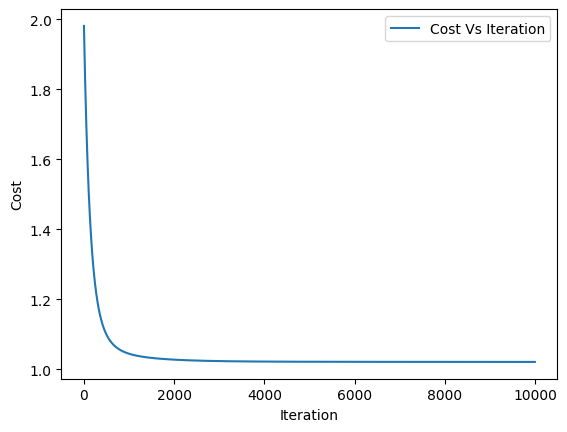

In [15]:
plt.plot(range(len(cost_his)),cost_his,label ='Cost Vs Iteration')
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.legend()
plt.show()

The linear model is predicted, with ideal values of weights and bias.

The aim is to decrease the final cost function value for corresponding weights and bias

In [16]:
# Final output
final_cost = cost_fun(w, b, x_train, y_train)
print("\nOUTPUT\n")
print(f"Final value of w = {w}, and b = {b} for a = {a}")
print(f"Final value of cost function = {final_cost}")


OUTPUT

Final value of w = [ 0.07779141  0.98118667  0.00906457 -0.13368287 -0.2209846  -0.01003507
 -0.12283462 -0.08571032  0.10913156  0.01429579  0.1618933  -0.02653004
  0.07217323  0.02255982  0.10664983 -0.03471823 -0.01037611  0.01744644], and b = 0.7086366848335717 for a = 1e-05
Final value of cost function = 1.0209887674446074


Define a function to caliculate R square value to evaluate performance
Rsquare = 1-(ssr/sst)

In [17]:
# Rsquare calculation
def Rsquare(y,y_predict):
    ssr = np.sum((y-y_predict)**2)
    sst = np.sum((y - y.mean())**2)
    return 1-(ssr/sst)

In [18]:
#compare with test.csv and train.csv using Rsquare value
print(f"\nR square value for Train data  {Rsquare(y_train,function(w,b,x_train))}")
print(f"\nR square value for Test data {Rsquare(y_test,function(w,b,x_test))}")


R square value for Train data  0.41215925350847393

R square value for Test data 0.4113230276414346


As we are plotting actual vs prediction we need a reference line x = y to visualize the performance of model

In [20]:
#create a reference x=y line
y_min = min(min(y_train),min(function(w,b,x_train)))
y_max= max(max(y_train),max(function(w,b,x_train)))
y = np.linspace(y_min,y_max, 500)  # Create 500 points between min and max value
x = y  # x is equal to y

Plot actual vs prediction with x = y to get better understanding of data

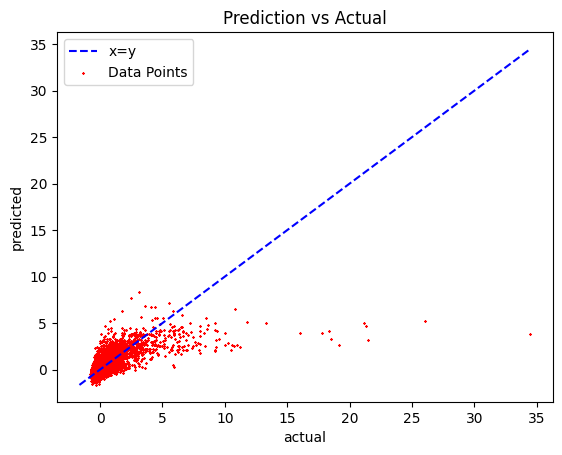

In [21]:
#plot actual vs prediction
plt.plot(x, y, color="blue",linestyle = "--", label="x=y")
plt.scatter(y_train,function(w,b,x_train), color='red', marker='x', s=1, label='Data Points')
plt.xlabel("actual")
plt.ylabel("predicted")
plt.title("Prediction vs Actual")
plt.legend()
plt.show()